# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#url = "http://192.168.73.9:3000/api/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shukat as sufi
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | strezhevoy
Processing Record 5 of Set 1 | bull savanna
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | kegeyli shahar
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | castillos
Processing Record 18 of Set 1 | zacatecas
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shukat as sufi,31.2600,34.2826,25.52,57,4,2.76,PS,1698718268
1,waitangi,-43.9535,-176.5597,15.61,79,100,6.71,NZ,1698718131
2,strezhevoy,60.7333,77.5889,-13.20,96,12,2.24,RU,1698718269
3,bull savanna,17.8868,-77.5902,24.54,85,64,1.89,JM,1698718269
4,kegeyli shahar,42.7767,59.6078,5.20,74,0,3.80,UZ,1698718270


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shukat as sufi,31.2600,34.2826,25.52,57,4,2.76,PS,1698718268
1,waitangi,-43.9535,-176.5597,15.61,79,100,6.71,NZ,1698718131
2,strezhevoy,60.7333,77.5889,-13.20,96,12,2.24,RU,1698718269
3,bull savanna,17.8868,-77.5902,24.54,85,64,1.89,JM,1698718269
4,kegeyli shahar,42.7767,59.6078,5.20,74,0,3.80,UZ,1698718270


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

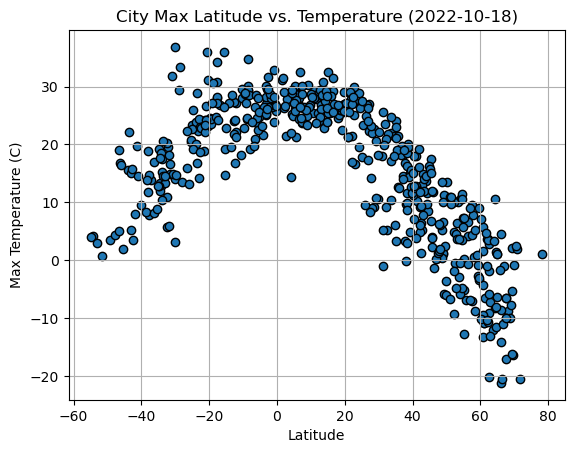

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

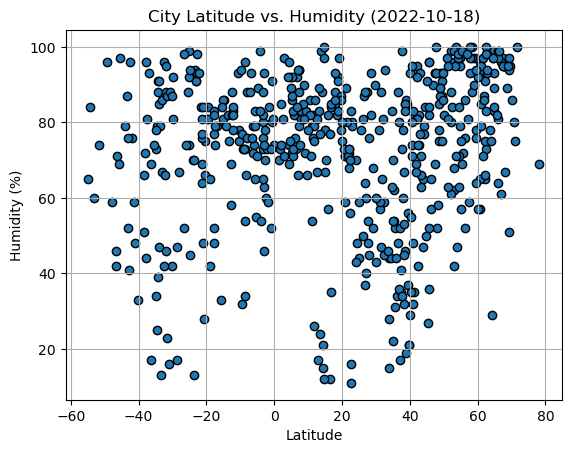

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

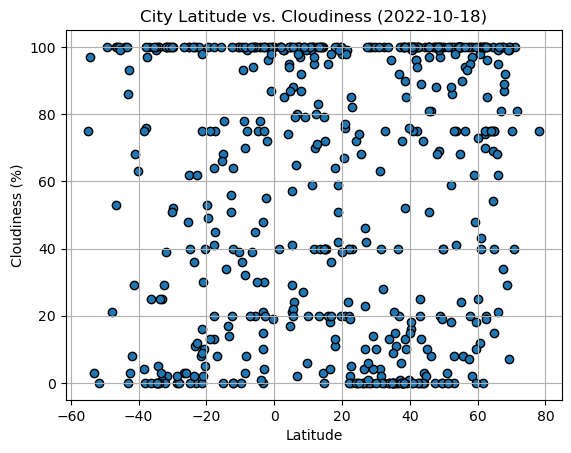

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

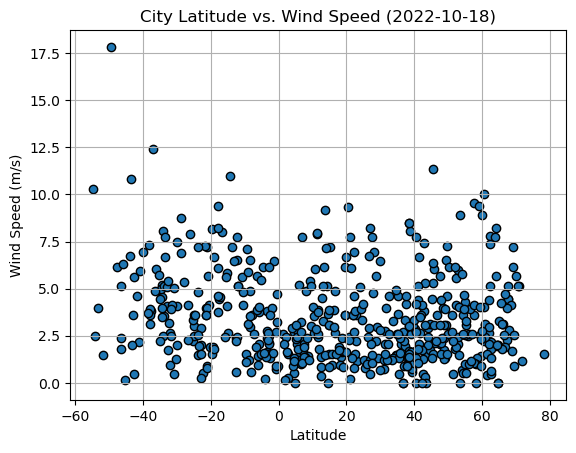

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def latitude_regressions(df, y_column):
    slope, intercept, rvalue,_,_ = linregress(df["Lat"], df[y_column])
    equation =f"y = {slope:.2f} x + {intercept:.2f}"
    print(f"The r-value is: {rvalue}")
    
    plt.scatter(df["Lat"], df[y_column])
    plt.xlabel("Latitude")
    plt.ylabel(y_column)

    plt.plot(df["Lat"], intercept + slope*df["Lat"], "r")

    max_x = df["Lat"].max()
    max_y = df[y_column].max()
    min_x = df["Lat"].min()
    min_y = df[y_column].min()
    range_x = max_x - min_x
    range_y = max_y - min_y
    ypos = min_y + (range_y * 0.05)

    if slope < 0:
        xpos = min_x + (range_x * 0.05)
        alignment = "left"
    else:
        xpos = max_x - (range_x * 0.05)
        alignment = "right"

    plt.text(xpos, ypos, equation, color="red", fontsize=15, horizontalalignment=alignment)
 



    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shukat as sufi,31.2600,34.2826,25.52,57,4,2.76,PS,1698718268
2,strezhevoy,60.7333,77.5889,-13.20,96,12,2.24,RU,1698718269
3,bull savanna,17.8868,-77.5902,24.54,85,64,1.89,JM,1698718269
4,kegeyli shahar,42.7767,59.6078,5.20,74,0,3.80,UZ,1698718270
12,bilibino,68.0546,166.4372,-8.71,67,92,2.81,RU,1698718274


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,15.61,79,100,6.71,NZ,1698718131
5,uturoa,-16.7333,-151.4333,26.75,79,8,8.03,PF,1698718271
6,mount isa,-20.7333,139.5000,36.02,28,10,5.66,AU,1698718271
7,adamstown,-25.0660,-130.1015,23.38,74,100,3.01,PN,1698718271
8,puerto natales,-51.7236,-72.4875,0.69,74,0,1.46,CL,1698718272


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8856723340885087


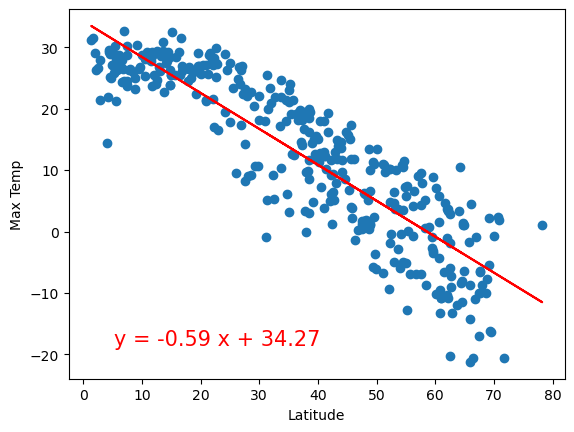

In [16]:
# Linear regression on Northern Hemisphere
latitude_regressions(northern_hemi_df, "Max Temp")

The r-value is: 0.7431497020324854


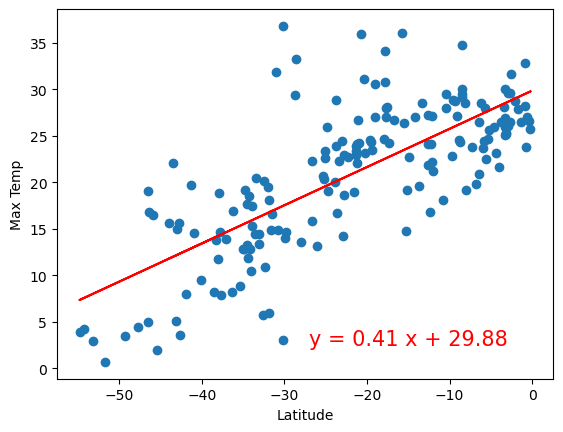

In [17]:
# Linear regression on Southern Hemisphere
latitude_regressions(southern_hemi_df, "Max Temp")

**Discussion about the linear relationship:** There is an inverse relationship between latitude and temperature. The closer the latitude gets to zero the temperature trends higher, inversely, the further the latitude gets from zero the temperature trends lower. There is a positive linear relationship between the data.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16058768893590625


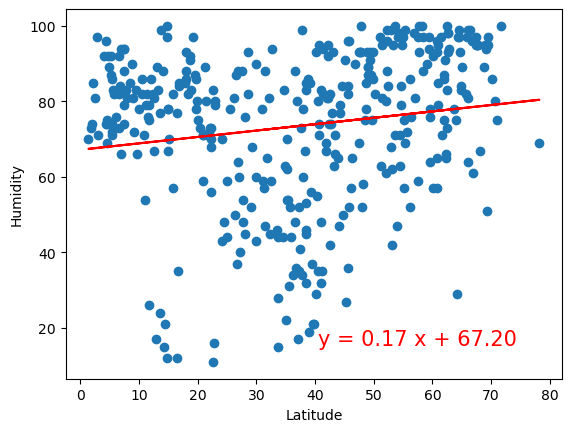

In [18]:
# Northern Hemisphere
latitude_regressions(northern_hemi_df, "Humidity")

The r-value is: 0.15572637202178594


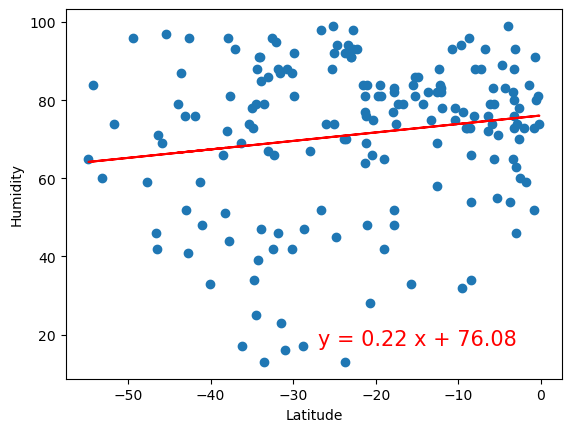

In [19]:
# Southern Hemisphere
latitude_regressions(southern_hemi_df, "Humidity")

**Discussion about the linear relationship:** There is little to no linear relationship between the data based on the r-value. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05504990158630518


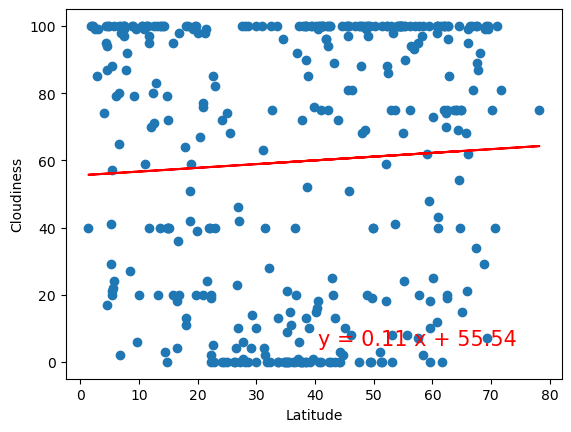

In [20]:
# Northern Hemisphere
latitude_regressions(northern_hemi_df, "Cloudiness")

The r-value is: 0.06280035845474355


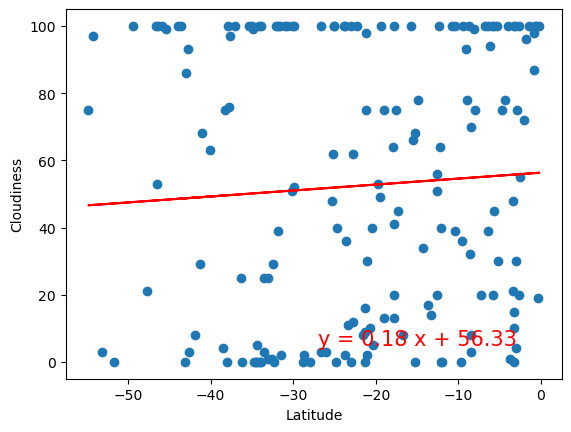

In [21]:
# Southern Hemisphere
latitude_regressions(southern_hemi_df, "Cloudiness")

**Discussion about the linear relationship:** There is little to no linear relationship between the data based on the r-value.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09021607594719754


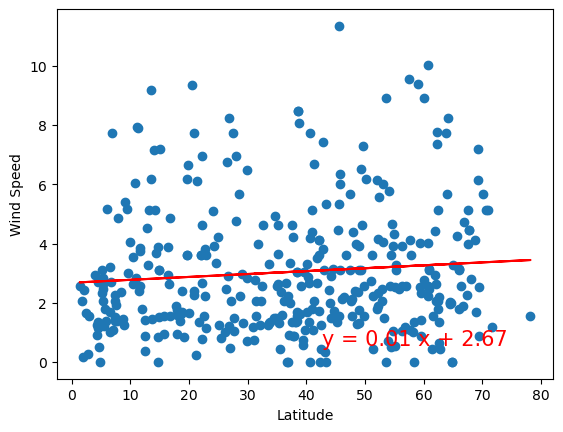

In [22]:
# Northern Hemisphere
latitude_regressions(northern_hemi_df, "Wind Speed")

The r-value is: -0.24922304630735193


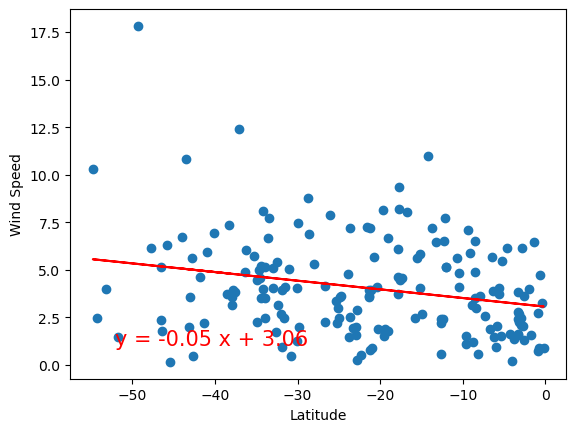

In [23]:
# Southern Hemisphere
latitude_regressions(southern_hemi_df, "Wind Speed")

**Discussion about the linear relationship:** There is little to no linear relationship between the data based on the r-value.